# Plot the hyperdigraph

----

- Note: The code is based on research from the paper [Persistent hyperdigraph homology and persistent hyperdigraph Laplacians](https://arxiv.org/abs/2304.00345). If you find this code helpful, feel free to cite the article as a reference.

In [1]:
""" Summary: plot the hyperdigraph from directed hyperedges (dict)

    Author:
        Dong Chen
    Create:
        2023-01-28
    Modify:
        2023-01-28
    Dependencies:
        python                    3.7.4
        numpy                     1.21.5
        matplotlib                3.5.1
"""


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ArrowStyle
import matplotlib.patheffects as pe

In [3]:

def fig_hyperdigraph(coords: np.array, dihyper_edge: dict, figname: str=None) -> None:

    # generate_all_1_path
    collect_1_path = []
    for hyperedge in dihyper_edge[2]:
        collect_1_path.append(hyperedge[0:2])
        collect_1_path.append(hyperedge[1::])
    dummy_1_path = list(set(collect_1_path).difference(set(dihyper_edge[1])))

    # figure
    fig_l = 3
    fig_h = 5
    pad_space = 0.1
    fig, ax = plt.subplots(
        figsize=[fig_l, fig_h],
        nrows=1, ncols=1,
        gridspec_kw={
            'wspace': 0.01/fig_l, 'hspace': 0.01/fig_l,
            # 'height_ratios': [0.8, 0.7, 0.6],
            'left': pad_space/fig_l, 'right': 1-pad_space/fig_l,
            'bottom': pad_space/fig_h, 'top': 1-pad_space/fig_h,
        },
    )

    font_dict = dict(
        stretch='semi-condensed', style='normal', size=20,
        family='times new roman',  # 'times new roma', 'arial'
    )

    # plot the background for dim 2, 1
    dihyperedge_color = {2: '#8CF8B7', 1: "#F9F871"}
    for dim_n in [2, 1]:
        path_seqs = dihyper_edge[dim_n]
        for path_seq in path_seqs:
            ax.plot(
                coords[path_seq, 0], coords[path_seq, 1],
                ls='-', linewidth=10+12*dim_n, color=dihyperedge_color[dim_n],
                solid_joinstyle='round', solid_capstyle='round',
                marker=None, mec='k', mfc='k', ms=5, alpha=0.4,
                path_effects=[pe.withStroke(linewidth=10+12*dim_n+1, foreground='k', alpha=0.4), pe.Normal()],
            )

    # plot node
    for node in dihyper_edge[0]:
        ax.plot(coords[node, 0], coords[node, 1], ls='none', marker='o', mec='k', mfc='k', ms=18, alpha=1)
    ax.scatter(0, 2, s=18**2, facecolors='w', edgecolors='k', linestyle='--', zorder=10)

    # plot path
    for i, edge_i in enumerate(dihyper_edge[1]):
        ax.annotate(
            "", xy=coords[edge_i[1], :], xycoords='data',
            xytext=coords[edge_i[0], :], textcoords='data',
            arrowprops=dict(
                arrowstyle=ArrowStyle('-|>', head_length=1.3, head_width=0.3),
                linewidth=1, linestyle='-', alpha=1, shrinkB=8, shrinkA=8,
                # color="#FF6037",
                color='k',
            ), zorder=12
        )

    for i, edge_i in enumerate(dummy_1_path):
        ax.annotate(
            "", xy=coords[edge_i[0], :], xycoords='data',
            xytext=coords[edge_i[1], :], textcoords='data',
            arrowprops=dict(
                arrowstyle=ArrowStyle('-|>', head_length=1.3, head_width=0.3),
                linewidth=1, linestyle=(5, (5,9)), alpha=1, shrinkB=8, shrinkA=8,
                color='k',
            ), zorder=12
        )

    # add text
    # ax.text(1.1, 0.1, s='1', c='k', ha='center', va='center', **font_dict)
    
    ax.set_ylim([-2.38, 2.38])
    ax.set_xlim([-1.32, 1.32])
    plt.axis('off')

    if figname is None:
        plt.show()
    else:
        fig_name = figname
        if fig_name.split('.')[-1] in ['png', 'jpg']:
            plt.savefig(f'{fig_name}', transparent=0, dpi=600, format='png')  # bbox_inches='tight'
        else:
            plt.savefig(f'{fig_name}')
    plt.close()
    return None

In [7]:
# define the input data
coords = np.array([[0, 2], [1, 1], [1, -1], [0, -2], [-1, -1], [-1, 1]])
dihyper_edge = {
    0: [(1,), (2,),  (3,),  (4,),  (5,)],
    1: [(0, 1), (2, 5), (2, 4), (4, 1), (1, 2), (2, 1), (2, 3), (3, 4)],
    2: [(0, 1, 2), (0, 5, 1), (2, 4, 1), (2, 3, 4)],
}
save_figure_name = 'hyperdigraph.png'


In [5]:
fig_hyperdigraph(coords, dihyper_edge, figname=save_figure_name)

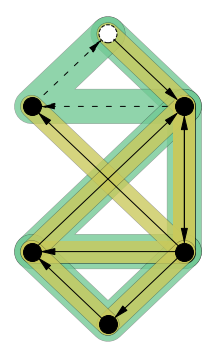

In [6]:
fig_hyperdigraph(coords, dihyper_edge, figname=None)
